In [18]:
import skimage.io as io
import skimage.data as data
import skimage.util as util
from skimage.color import rgb2gray, rgb2lab, rgb2hsv
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Lista de plugins disponibles (no necesariamente instalados):
io.find_available_plugins()
# Lista de plugins instalados para cada funci´on:
io.plugin_order()

# Lectura -> io.imread
# Escritura -> io.imsave
# Visualizar -> io.imshow / pyplot.imshow


{'imread': ['imageio', 'matplotlib'],
 'imsave': ['imageio'],
 'imshow': ['matplotlib'],
 'imread_collection': ['imageio', 'matplotlib'],
 'imshow_collection': ['matplotlib'],
 '_app_show': ['matplotlib']}

# Ejercicio 1.1.- Leer y visualizar imágenes

__a)__ Lea la imagen ’lena.png’; llamemosle lena1. Escriba por pantalla su tamñno (shape), sus valores m ́ınimo y m ́aximo, y su tipo. Visualice la imagen.

In [2]:
def image_caracteristics(image, image_name="Imagen"):
    print(f"Usando {image_name}:\n")
    print("Tamaño: ", image.shape)
    print("Valor Maximo: ", np.max(image))
    print("Valor Minimo: ", np.min(image))
    print("Tipo: ", image.dtype)

Usando lena.png:

Tamaño:  (512, 512, 3)
Valor Maximo:  255
Valor Minimo:  3
Tipo:  uint8


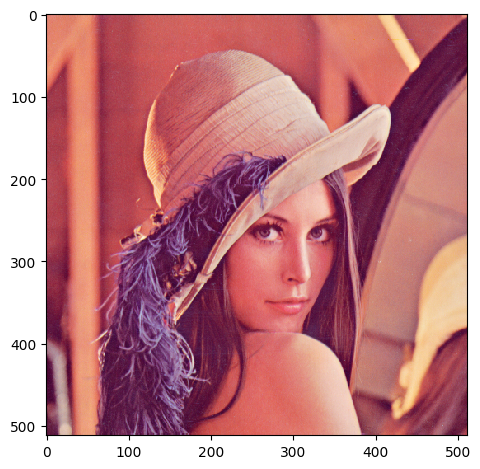

In [3]:
lena1 = io.imread("lena.png")
# Caracteristicas de la imagen
image_caracteristics(lena1, "lena.png")
io.imshow(lena1)

__b)__ Lea la imagen ’lena.png’, usando el par ́ametro ‘as gray=True’; llamemosle lena2. Escriba por pantalla su tamaño, sus valores mínimo y máximo, y su tipo. Visualice la imagen, consiguiendo que se vea en escala de grises.

Usando lena.png:

Tamaño:  (512, 512)
Valor Maximo:  0.9654356862745097
Valor Minimo:  0.07254666666666666
Tipo:  float64


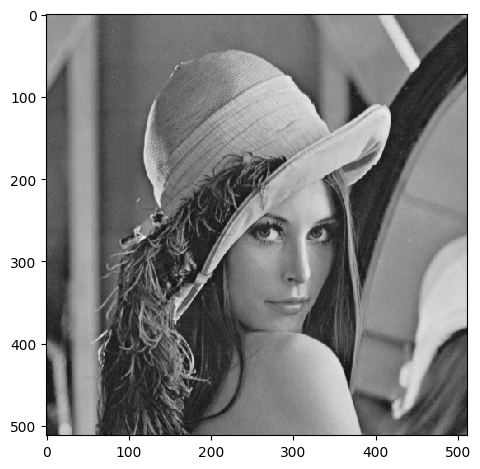

In [4]:
lena2 = io.imread("lena.png", as_gray=True)
# Caracteristicas de la imagen
image_caracteristics(lena2, "lena.png")
io.imshow(lena2)



__c)__ Divida el valor de la imagen lena2 por 2 y s ́umele 0,25; llamemosle lena3 al resultado. Escriba por pantalla sus valores mínimo y máximo. Visualice en subfiguras anexas lena2 y lena3, usando escala de grises, y consiguiendo que las diferencias de brillo sean apreciables visualmente.

Usando lena2.png:

Tamaño:  (512, 512)
Valor Maximo:  0.9654356862745097
Valor Minimo:  0.07254666666666666
Tipo:  float64


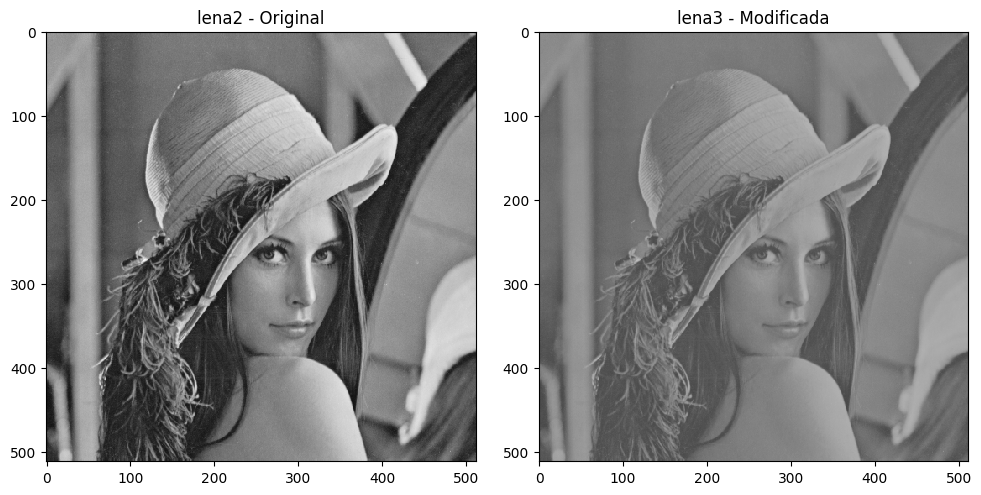

In [5]:
lena3 = np.divide(lena2, 2) + 0.25
# Caracteristicas de la imagen
image_caracteristics(lena2, "lena2.png")

plt.figure(figsize=(10, 5))

# lena2 brillo por defecto
plt.subplot(1, 2, 1) # lena2
io.imshow(lena2)
plt.title("lena2 - Original")

# lena3 menos brillo
plt.subplot(1, 2, 2) # lena3
io.imshow(lena3)
plt.title("lena3 - Modificada")

# Mostrar las imágenes
plt.show()

# Ejercicio 1.2.- Escribir im ́agenes en disco

__a)__ Guarde las imagenes lena2 y lena3 del Ejercicio 1.1, en los ficheros lena2.png y lena3.png, respectivamente, de la carpeta resultados. Asegurese de que la diferencia de intesidades es apreciable en las im ́agenes guardadas (con un visor externo, o volviendolas a leer)


In [6]:
path = "resultados/"
# Si la carperta no existe la creamos
if not os.path.exists(path):
    os.mkdir(path)

# Convertimos el rango de la imagen de [0,1] a [0,255]
# Pasamos el formato a uint8 y escala de grises
lena2_converted = Image.fromarray((lena2 * 255).astype(np.uint8)).convert('L')
lena3_converted = Image.fromarray((lena3 * 255).astype(np.uint8)).convert('L')

# Guardamos las imágenes usando PIL o skimage
lena2_converted.save(os.path.join(path, "lena2.png"))
lena3_converted.save(os.path.join(path, "lena3.png"))

__b)__ Repita la operacion anterior, pero multiplicando antes las imagenes por 10, y almacenando los resultados en lena2b.png y lena3b.png, respectivamente.

In [7]:
lena2_mult = lena2 * 10
lena3_mult = lena3 * 10
lena2_converted = Image.fromarray((lena2_mult * 255).astype(np.uint8)).convert('L')
lena3_converted = Image.fromarray((lena3_mult * 255).astype(np.uint8)).convert('L')

# Guardamos las imágenes usando PIL o skimage
lena2_converted.save(os.path.join(path, "lena2b.png"))
lena3_converted.save(os.path.join(path, "lena3b.png"))

- __¿Que ocurre y por que?__

Las imagenes quedan con fallos y distorsionadas. Esto se produce porque los valores de la imagen exceden los valores del rango (0-255 para imagenes de 8 bits), produciendo que se tomen valores incorrectos respecto a la imagen original.

- __¿Como debemos hacer para que las diferencias en las
imagenes se puedan almacenar?__

Podemos extender el valor del rango dejando de utilizar un sistema RGB o, normalizar los valores de la imagen para que se encuentren en un rango especifico.


# Ejercicio 1.3.- Enteros, Flotantes y Booleanos

__a)__ Cree tres imagenes de degradado, de tamaño 100 ×100, y:
- A: tipo np.float64, y valores de 0.1 a 0.9.
- B: tipo np.uint8, y valores de 25 a 230.
- C: tipo np.int32, y valores de -230 a 230.

In [8]:
def intensity_gradient(size=(100, 100), dtype=np.uint8, values=(0, 255)):
    rows, cols = size
    mn, mx = values
    result = np.linspace(mn, mx, rows*cols).reshape(rows, cols)
    return result.astype(dtype)

C = intensity_gradient(size=(100, 100), dtype=np.float64, values=(0.1, 0.9))
A = intensity_gradient(size=(100, 100), dtype=np.uint8, values=(25, 230))
B = intensity_gradient(size=(100, 100), dtype=np.int32, values=(-230, 230))

__b)__ Visualice las tres imagenes, en escala de grises y sin normalizar, y reporte su valor minimo y maximo.

Image A: 

Usando A:

Tamaño:  (100, 100)
Valor Maximo:  230
Valor Minimo:  25
Tipo:  uint8
Image B: 

Usando B:

Tamaño:  (100, 100)
Valor Maximo:  230
Valor Minimo:  -230
Tipo:  int32
Image C: 

Usando C:

Tamaño:  (100, 100)
Valor Maximo:  0.9
Valor Minimo:  0.1
Tipo:  float64


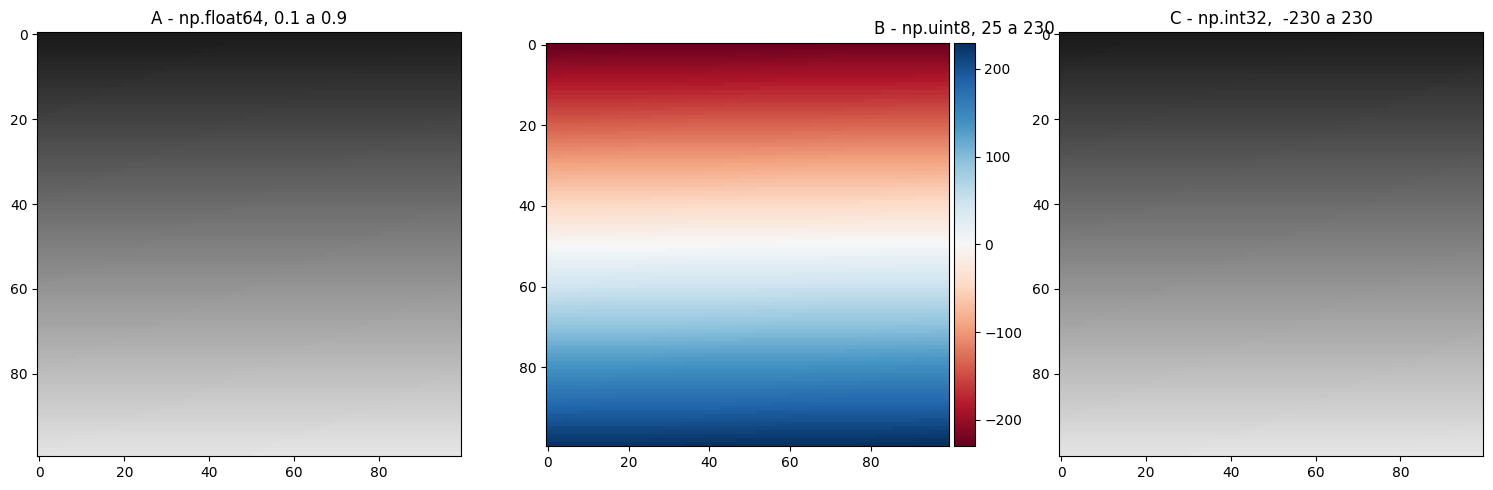

In [9]:
print("Image A: \n")
# Caracteristicas de la imagen
image_caracteristics(A, "A")

print("Image B: \n")
# Caracteristicas de la imagen
image_caracteristics(B, "B")

print("Image C: \n")
# Caracteristicas de la imagen
image_caracteristics(C, "C")

# Visualizamos las imagenes
plt.figure(figsize=(15, 5))

# lena2 brillo por defecto
plt.subplot(1, 3, 1) # lena2
io.imshow(A)
plt.title("A - np.float64, 0.1 a 0.9")

# lena3 menos brillo
plt.subplot(1, 3, 2) # lena3
io.imshow(B)
plt.title("B - np.uint8, 25 a 230")

# lena3 menos brillo
plt.subplot(1, 3, 3) # lena3
io.imshow(C)
plt.title("C - np.int32,  -230 a 230")

# Mostrar las imágenes
plt.show()

__c)__ Explore el resultado de las funciones img as float, img as uint, img as int e img as bool de skimage sobre las tres im ́agenes anteriores, asi como la salida de la funcion skimage.dtype limits aplicada sobre las imagenes de entrada y salida. Explique lo que ocurre.

In [10]:
# Mostrar solo la primera fila para cada conversión

img_floatA = util.img_as_float(A)
img_floatB = util.img_as_float(B)
img_floatC = util.img_as_float(C)
print("\nUsing img_as_float: ", img_floatA[0][0], img_floatB[0][0], img_floatC[0][0])  # Mostramos solo la primera fila

img_uintA = util.img_as_uint(A)
img_uintB = util.img_as_uint(B)
img_uintC = util.img_as_uint(C)
print("\nUsing img_as_uint: ", img_uintA[0][0], img_uintB[0][0], img_uintC[0][0])  # Mostramos solo la primera fila

img_intA = util.img_as_int(A)
img_intB = util.img_as_int(B)
img_intC = util.img_as_int(C)
print("\nUsing img_as_int: ", img_intA[0][0], img_intB[0][0], img_intC[0][0])  # Mostramos solo la primera fila

img_boolA = util.img_as_bool(A)
img_boolB = util.img_as_bool(B)
img_boolC = util.img_as_bool(C)
print("\nUsing img_as_bool: ", img_boolA[0][0], img_boolB[0][0], img_boolC[0][0])  # Mostramos solo la primera fila



Using img_as_float:  0.09803921568627451 -1.0710209613065333e-07 0.1

Using img_as_uint:  6425 0 6554

Using img_as_int:  3212 -230 3276

Using img_as_bool:  False False False


/home/clown/3-year/computer_vision/Computer-Vision/lib/python3.12/site-packages/skimage/util/dtype.py:527: UserWarning: Downcasting int32 to uint16 without scaling because max value 230 fits in uint16
  return _convert(image, np.uint16, force_copy)
/home/clown/3-year/computer_vision/Computer-Vision/lib/python3.12/site-packages/skimage/util/dtype.py:552: UserWarning: Downcasting int32 to int16 without scaling because max value 230 fits in int16
  return _convert(image, np.int16, force_copy)


- __Explique lo que ocurre__

Cada funcion convierte la matriz de la imagen a un tipo espefico de dato. La caracteristica mas resaltanble es el caso de __uint__ e __int__. Al usar un formato sin signo como es el caso del __uint__ los valores tienen el doble de rango positvo, pero no presentan valores negativos; dejando estos a 0. Lo contario ocurre con los __int__ ya que tenemos la mitad de rango positivo, pero lo compensamos con la presencia de valores negativos.

Para las otras dos funciones, en __img\_as\_float__ puede tomar valores de $[0,1]$ o de $[-1,1]$ dependiendo de si el dato anterior tenia signo o no. La funcion__img\_as\_bool__ pone como __True__ los valores superiores a la mitad del valor máximo posible en el tipo de dato original, y __False__ al resto y negativos.

# Ejercicio 1.4.- Indexacion

__a)__ Sobre una copia de brick, asigne un valor de intensidad ”blanco puro”, a la
ventana definida por las filas 100 a 150, y las columnas 20 a 120. Visualice el
resultado, su valor maximo, su valor minimo y el tipo

Usando White Brick:

Tamaño:  (512, 512)
Valor Maximo:  255
Valor Minimo:  63
Tipo:  uint8


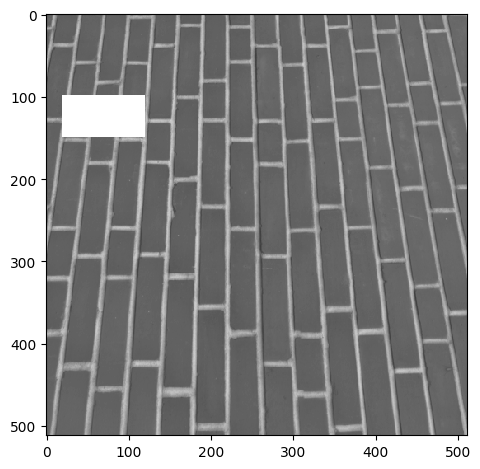

In [11]:
brick = data.brick()        # 512x512
astro = data.astronaut()

white_brick = brick.copy()
# Blanco puro
white_brick[100:150, 20:120] = 255
image_caracteristics(white_brick, "White Brick")
io.imshow(white_brick)

__b)__ Cree una mascara binaria (llamemosle brickmsk) que valga 1 en las posiciones
donde brick sea mayor que el 50 % del rango dinamico y 0 en el resto. Visualice
el resultado, asi como su valor maximo, su valor minimo y el tipo

Usando White Brick:

Tamaño:  (512, 512)
Valor Maximo:  True
Valor Minimo:  False
Tipo:  bool


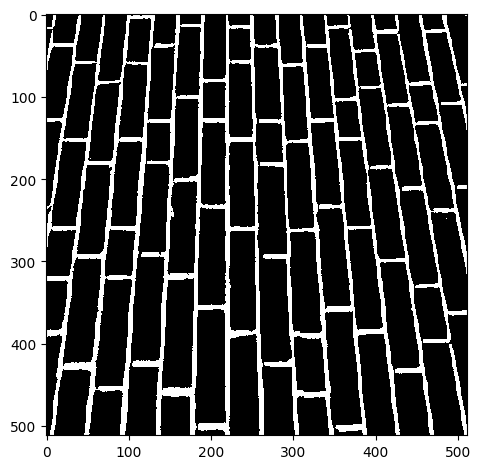

In [12]:
# Sobre Brick o White Brick
dynamic_range = np.max(brick) - np.min(brick)

brickmsk = brick > (np.min(brick) + dynamic_range / 2)
image_caracteristics(brickmsk, "White Brick")
io.imshow(brickmsk)

__c)__ Modifique los valores de una copia de astronaut para tomen un valor [r,g,b]
aleatorio en las posiciones indicadas por la mascara brickmsk

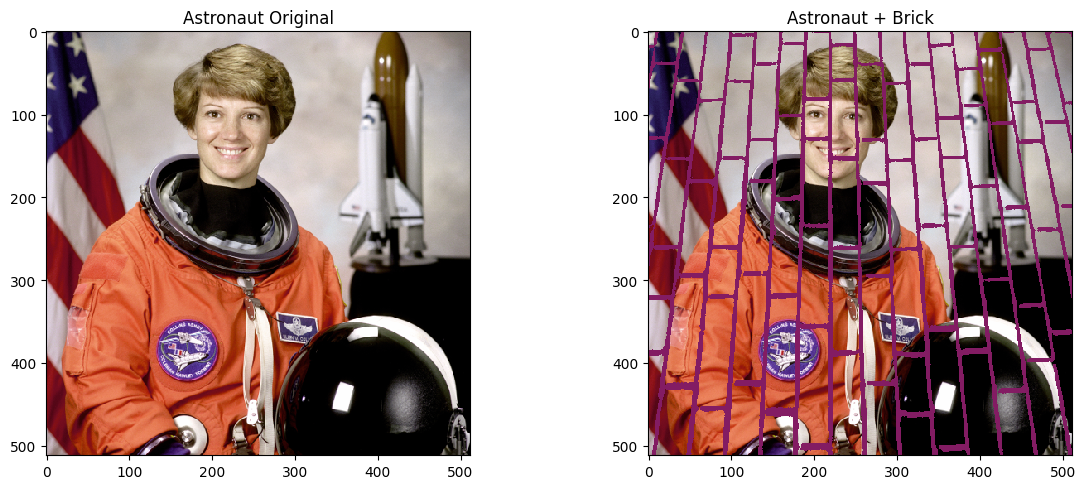

In [13]:
astro_rgb = astro.copy()
# Generamos un color aleatorio
color = list(np.random.choice(range(256), size=3))
# En los pixeles de astro_rgb donde brickmsk sea True, se añade el color
astro_rgb[brickmsk] = color

# Visualizamos las imagenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1) 
io.imshow(astro)
plt.title("Astronaut Original")

plt.subplot(1, 2, 2) 
io.imshow(astro_rgb)
plt.title("Astronaut + Brick")

# Mostrar las imágenes
plt.show()

__d)__ Usando una copia de astronaut, visualice, en cuatro subfiguras, cada uno de
sus canales RGB, en escala de grises, junto con la imagen en color

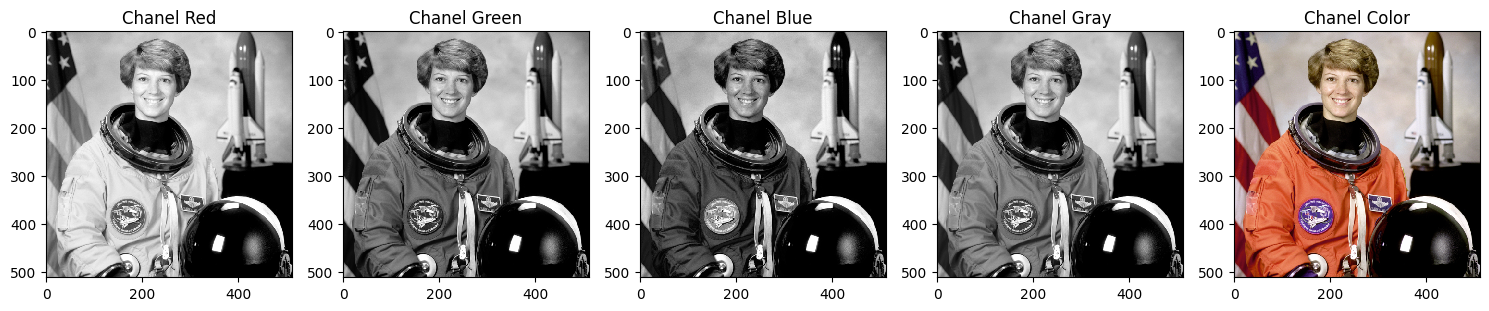

In [14]:
astro_chanels = astro.copy()

red = astro_chanels[..., 0]     # Red
green = astro_chanels[..., 1]   # Green
blue = astro_chanels[..., 2]    # Blue
gray = rgb2gray(astro_chanels)

# Visualizamos las imagenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1) 
io.imshow(red)
plt.title("Chanel Red")

plt.subplot(1, 5, 2) 
io.imshow(green)
plt.title("Chanel Green")

plt.subplot(1, 5, 3) 
io.imshow(blue)
plt.title("Chanel Blue")

plt.subplot(1, 5, 4) 
io.imshow(gray)
plt.title("Chanel Gray")


plt.subplot(1, 5, 5) 
io.imshow(astro)
plt.title("Chanel Color")

# Mostrar las imágenes
plt.show()

__e)__ Usando la funcion __skimage.draw.disk__, obtenga las coordinadas de un circulo en una posicion aleatoria del espacio 512×512, y radio 20. Modifique la imagen resultante del apartado (c) para que los valores del canal verde en las posiciones del circulo sean 100 % del rango dinamico, dejando el resto de valores sin cambiar. Visualize el resultado

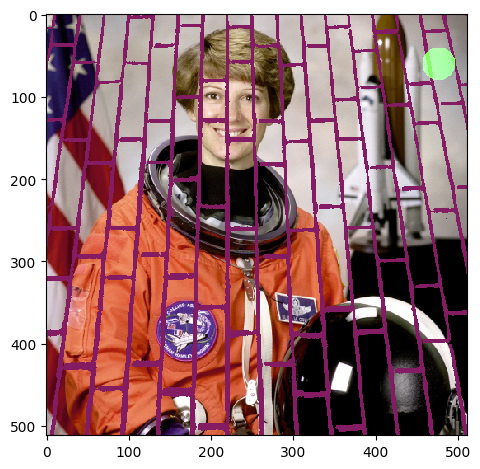

In [17]:
from skimage.draw import disk
import random

astro_circle = astro_rgb.copy()
# Cojemos el rango dinamico del canal verde
dynamic_range = np.max(astro_rgb[..., 1]) - np.min(astro_rgb[..., 1])

position = (random.randint(20,492), random.randint(20,492))  # Quitamos 20 unidades para que el cirulo no salga de la imagen
rr,cc = disk(position, 20)

astro_circle[rr,cc, 1] = dynamic_range

io.imshow(astro_circle)

astro_circle = None


# Ejercicio 2.1.- Espacios de color

__a)__ Muestre en una cuadricula de 3 ×3 de subfiguras: los tres canales de RGB en escala de grises, los tres canales de CIE-L*a*b* en escala de grises, y los tres canales de HSV en escala de grises. Use los titulos de las figuras para indicar el nombre del canal y su rango de valores

In [28]:
def show_figures(size, row:int, col:int, images):
    plt.figure(figsize=size)
    for idx in range(1,col + 1):
        plt.subplot(row, col, idx) 
        io.imshow(images[idx])
        plt.title(f"Image {images[idx]}")
    plt.show()

In [33]:
retina = data.retina()
butterfly = "butterfly.jpg"

retina_r = retina[..., 0]
retina_g = retina[..., 1]
retina_b = retina[..., 2]

retina_lab = rgb2lab(retina)
retina_l = retina_lab[..., 0]
retina_a = retina_lab[..., 1]
retina_B = retina_lab[..., 2]

retina_hsv = rgb2hsv(retina)
retina_h = retina_hsv[..., 0]
retina_s = retina_hsv[..., 1]
retina_v = retina_hsv[..., 2]


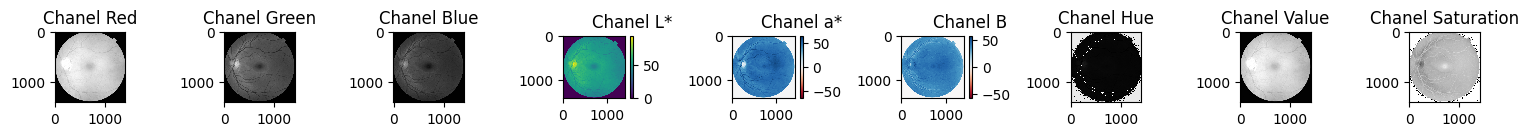

In [36]:
# Visualizamos las imagenes
plt.figure(figsize=(15, 15))

plt.subplot(1, 9, 1) 
io.imshow(retina_r)
plt.title("Chanel Red")

plt.subplot(1, 9, 2) 
io.imshow(retina_g)
plt.title("Chanel Green")

plt.subplot(1, 9, 3) 
io.imshow(retina_b)
plt.title("Chanel Blue")


plt.subplot(1, 9, 4) 
io.imshow(retina_l)
plt.title("Chanel L*")

plt.subplot(1, 9, 5) 
io.imshow(retina_a)
plt.title("Chanel a*")

plt.subplot(1, 9, 6) 
io.imshow(retina_B)
plt.title("Chanel B")


plt.subplot(1, 9, 7) 
io.imshow(retina_h)
plt.title("Chanel Hue")

plt.subplot(1, 9, 8) 
io.imshow(retina_v)
plt.title("Chanel Value")

plt.subplot(1, 9, 9) 
io.imshow(retina_s)
plt.title("Chanel Saturation")

plt.show()

__b)__ Observando los resultados: ¿Que canal es mas apropiado para la segmentacion objetivo? Razone la respuesta

blablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablabblablabablabalblablablab

__c)__ Compare diferentes canales de gris calculado a partir de las siguientes opciones: media de RGB, V de HSV, L* de CIE-L*a*b*.

In [38]:
mean_rgb = np.mean([retina_r, retina_b, retina_g])
mean_hsv = np.mean(retina_v)
mean_lab = np.mean(retina_l)

print("RGB: ", mean_rgb)
print("HSV: ", mean_hsv)
print("Lab*: ", mean_lab)


RGB:  89.69798935601496
HSV:  0.6252932087170494
Lab*:  39.64988000504808


__d)__ Realizar la misma comparacion pero teniendo en cuenta la saturacion de HSV y la saturacion calculada a partir de L*a*b*

In [39]:
mean_hsv = np.mean([retina_v, retina_s])
mean_lab = np.mean([retina_l, retina_a, retina_B])

print("RGB: ", mean_rgb)
print("HSV: ", mean_hsv)
print("Lab*: ", mean_lab)

RGB:  89.69798935601496
HSV:  0.6920777220227196
Lab*:  35.296338713815636


__e)__ Calcule los canales oponentes Red-Green y Blue-Yellow, calculados a partir de RGB o usando las componentes a* y b* de CIE-L*a*b*

# Ejercicio 3.1.- Representaci ́on de histogramas

__a)__ Calcule el histograma de brillo de las imagenes en escala de grises

__b)__ Represente el histograma con diferentes numeros de bins: 10 y 100

__c)__ Haga lo mismo para diferentes ventanas de la imagen. Represente visualmente la imagen general, cuadrados de subventanas y sus histogramas asociados. Seleccione regiones de alto contraste, de bajo contraste, y zonas irregular de mas o menos brillo

__d)__ Repita el ejercicio anterior sumando una constante positiva y negativa: 0,25 y -0,25. Analice de nuevo los histogramas resultantes y sus cambios

__e)__ Repita el ejercicio anterior multiplicando una constante mayor y menos que 1: 0,5 y 1.5. Analice de nuevo los histogramas resultantes y sus cambios